# Classification

# I. Introduction

This assignment is concerned with performing classification on the selected datasets using following three algorithms:
* Pocket Perceptron Algorithm
* Quadratic Discriminant Analysis
* Linear Discriminant Analysis
* Logistic Regression

These algorithms are implemented using Python3 code in this notebook and are applied on Census Income dataset. Experiments are performed on both training and tests dataset and comparison of results is performed.

# II. Data

In [567]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
from IPython.display import display, Markdown
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
%matplotlib inline

## Census Income Data
Source: https://archive.ics.uci.edu/ml/datasets/Census+Income
The extraction of Census Income dataset is from the 1994 Census database by Barry Becker (from Data Mining and Visualization Lab, Silicon Graphics). The dataset can be used to predict whether a particular person can earn more than $50k per year or not.

### Attributes
The attributes of the dataset are:
* age: continuous numbers. 
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* fnlwgt: Final sampling weight, generated by census bureau. 
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* education-num: continuous. 
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
* sex: Female, Male. 
* capital-gain: gain from assets; continuous. 
* capital-loss: loss from other assets; continuous. 
* hours-per-week: continuous. 
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Read Data & Preprocessing

In [520]:
# Read the data
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
strip = lambda x: x.strip()
converters = {
    'workclass': strip,
    'education': strip,
    'marital-status': strip,
    'occupation': strip,
    'relationship': strip,
    'race': strip,
    'native-country': strip,
    'salary': strip
};
census_train = pd.read_csv('adult.data', header=None, names=names, converters=converters)
census_test = pd.read_csv('adult.test', header=None, names=names, converters=converters)

# Data preprocessing, handling missing values and replace by mode
census_train.replace('?', census_train.mode().iloc[0], inplace=True)
census_test.replace('?', census_test.mode().iloc[0], inplace=True)
census_test['age'] = pd.to_numeric(census_test['age'], errors='coerce').fillna(0).astype(np.int64)
census_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Data Visualization & Analysis

#### Country-wise analysis of Salaries
The following plot indicates country-wise percentage of people earning less than and more than 50K. From the data we can observe that Holland and Outlying US states has almost all people earning less than 50 K. However, it is a false information as we have very less data for these countries.

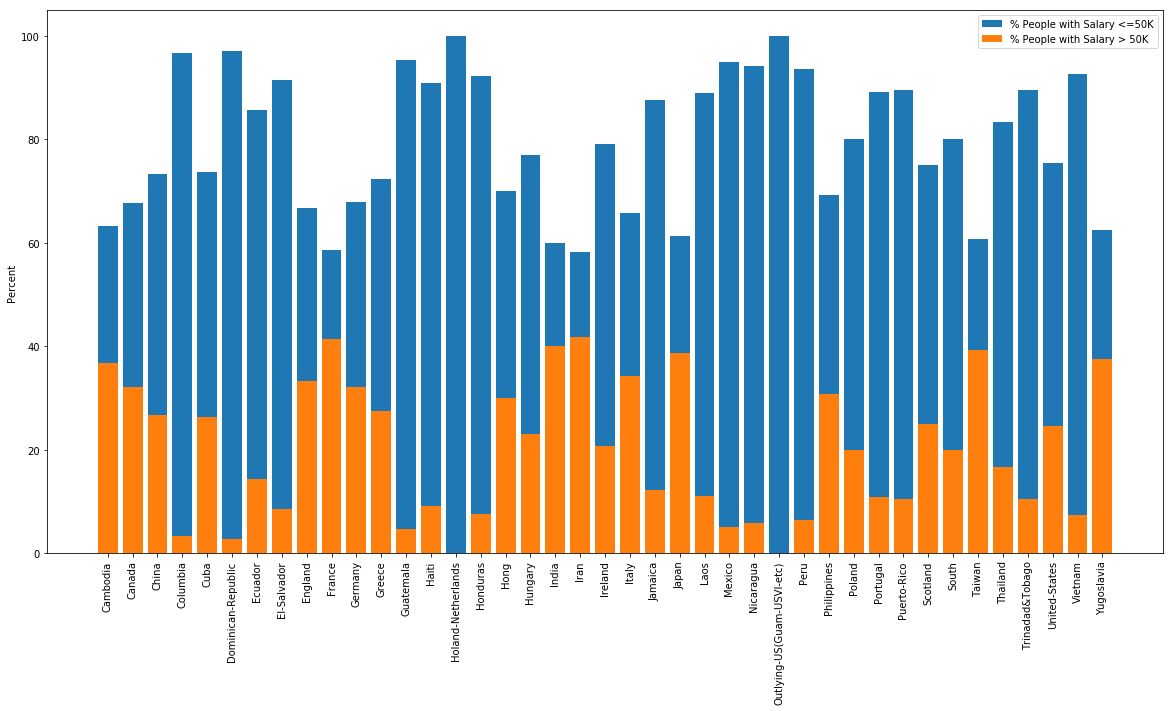

In [658]:
counts = census_train.groupby(['native-country', 'salary']).size().reset_index(name='counts')
totals = counts.groupby(['native-country']).agg('sum')
percents = list()
for index, row in counts.iterrows():
    percents.append(row['counts'] * 100 / totals.loc[row['native-country']]['counts'])
counts['percents'] = percents
counts['native-country'] = counts['native-country'].astype('category')
plt.figure(figsize=(20, 10))
plt.bar(counts[counts['salary'] == '<=50K']['native-country'].cat.codes, counts[counts['salary'] == '<=50K']['percents'], label='% People with Salary <=50K')
plt.bar(counts[counts['salary'] == '>50K']['native-country'].cat.codes, counts[counts['salary'] == '>50K']['percents'], label='% People with Salary > 50K')
plt.xticks(range(41), counts['native-country'].cat.categories, rotation=90)
plt.ylabel('Percent')
plt.legend()
plt.show()

#### Working Class wise analysis of Salaries
The following plot indicates working class wise percentage of people earning less than and more than 50K. From the data we can observe that the self-employed class has the highest percentage of people earning more than 50K, while the private sector has the least percentage.

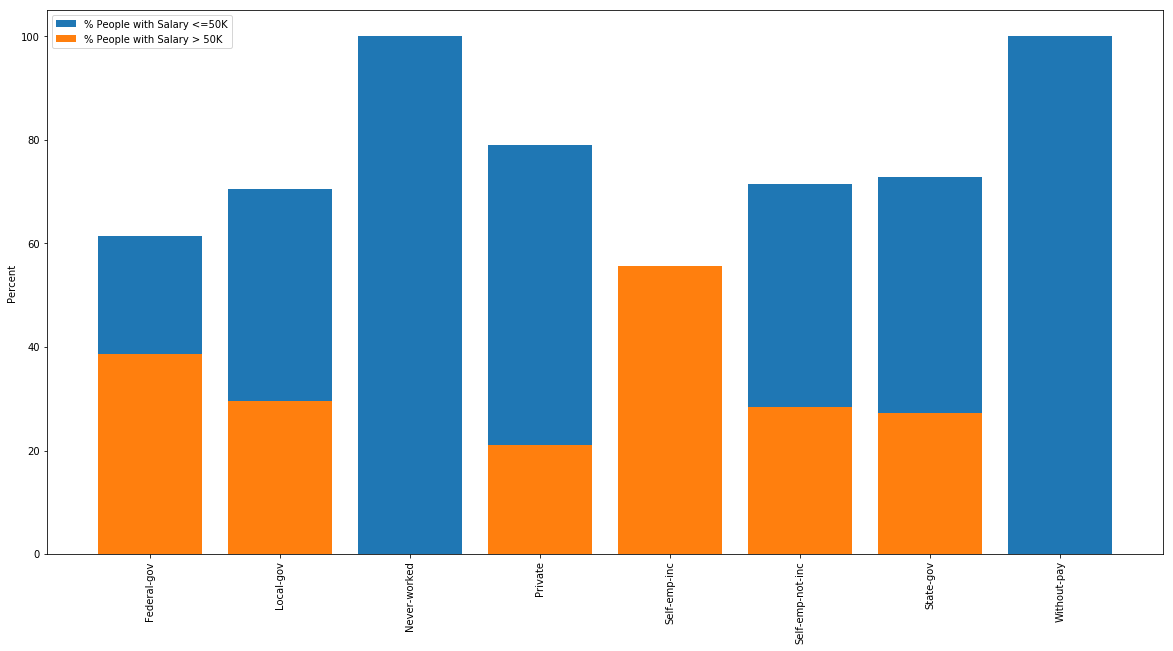

In [339]:
counts = census_train.groupby(['workclass', 'salary']).size().reset_index(name='counts')
totals = counts.groupby(['workclass']).agg('sum')
percents = list()
for index, row in counts.iterrows():
    percents.append(row['counts'] * 100 / totals.loc[row['workclass']]['counts'])
counts['percents'] = percents
counts['workclass'] = counts['workclass'].astype('category')
plt.figure(figsize=(20, 10))
plt.bar(counts[counts['salary'] == '<=50K']['workclass'].cat.codes, counts[counts['salary'] == '<=50K']['percents'], label='% People with Salary <=50K')
plt.bar(counts[counts['salary'] == '>50K']['workclass'].cat.codes, counts[counts['salary'] == '>50K']['percents'], label='% People with Salary > 50K')
plt.xticks(range(8), counts['workclass'].cat.categories, rotation=90)
plt.ylabel('Percent')
plt.legend()
plt.show()

### Scatter Plot of Data
The following scatter plot considers "age" and "education-num" fields. These two fields are used further for performing experiments.

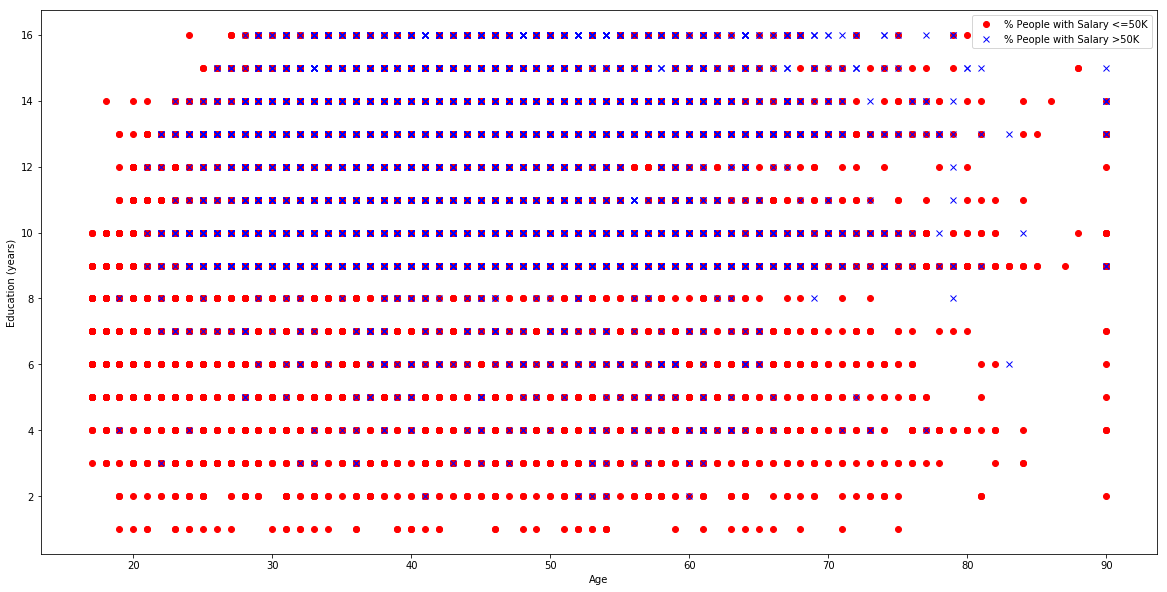

In [693]:
plt.figure(figsize=(20, 10))
plt.plot(census_train[census_train['salary'] == '<=50K']['age'].values, census_train[census_train['salary'] == '<=50K']['education-num'].values, 'or', label='% People with Salary <=50K')
plt.plot(census_train[census_train['salary'] == '>50K']['age'].values, census_train[census_train['salary'] == '>50K']['education-num'].values, 'xb', label='% People with Salary >50K')
plt.xlabel('Age')
plt.ylabel('Education (years)')
plt.legend()
plt.show()

### Preliminary Observation
From the above scatter plot we can observe that most of the population that earns more than 50K USD belongs to adult age group (25 years 60 years) and have studied more than high school. Less than 50K USD is earned by the population who has very less education.


# III. Method

Summarize the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 
Finish the normalize function for you. 
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the 4 classification models 
 - your implementation and description


### A. Super Classs Definition

In [340]:
import numpy as np
import abc

# Super class for machine learning models 

class BaseModel(abc.ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abc.abstractmethod
    def train(self, X, T):
        pass

    @abc.abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)
        
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm
The Pocket Algorithm is an extension of Perceptron Algorithm for supervised classification. Perceptron performs linear classification by using weights. It iterates over the training examples, and update the weights in a way that would result in correct classification. The weights are manipulated with following formula:
$$
w^{(k+1)} = w^{(k)} + \alpha t_i x_i
$$

In the Pocket extension, as the weight is updated, it is compared with previously pocketed weight to see if it performs better than the previous one. At the end of the training, weights we will get will be the best solution so far. 

#### Implementation
The "Pocket" class defined below, implements the Pocket Perceptron Algorithm. It consists of following 3 methods:
* compare: which compares the updated weight with the pocketed weight. It performs classification with both weights and indicates which weight worked better
* train: this method performs the training using the training dataset. The number of iterations chosen are 100 and learning rate is 0.1. 
* use: the use method can be used to perform classification using trained weights

In [504]:
class Pocket(Classifier):
    def compare(self, X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        # return 1 if w is better else -1
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self, X, T):
        X = self.normalize(X)
        X = self.add_ones(X)
        
        m = np.shape(X)[0]        
        maxiter = 100
        alpha = 0.1
        
        # initialize weights with zero
        self.w = np.zeros(np.shape(X)[1])
        w_pocket = copy.copy(self.w)
        
        for i in range(maxiter):
            converged = True
            for k in np.random.permutation(m):
                y = self.w @ X[k]
                # update weight if classification is incorrect
                if np.sign(y) != np.sign(T[k]):
                    converged = False
                    self.w += alpha * T[k] * X[k]
                    
                    if self.compare(X, T, self.w, w_pocket) > 0: 
                        w_pocket[:] = self.w[:]
            if converged:
                break
        # final best weight
        self.w = w_pocket
        
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        X = self.add_ones(X)
        return np.sign(X @ self.w)

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
$

### C. Quadratic Discriminant Analysis (QDA)

For a binary classification problem, $k \in \{-1, +1\}$, we have a higher posterior probability $P(T = +1 \mid \xv)$ for the sample $\xv$ with the positive label. Thus, 

$$
P(T = +1 \mid \xv) > P(T = -1 \mid \xv).
$$

The inequality will be the opposite in case of the negative samples. 

Using this inequality and the Gaussian Assumption, we can come up with following inequality: 

$$
-\frac{1}{2} \ln \vert \boldsymbol\Sigma_+ \vert - \frac{1}{2} (\xv - \boldsymbol\mu_+)^\top \boldsymbol\Sigma_+^{-1} (\xv - \boldsymbol\mu_+) + \ln P(T = +1) > -\frac{1}{2} \ln \vert \boldsymbol\Sigma_- \vert - \frac{1}{2} (\xv - \boldsymbol\mu_-)^\top \boldsymbol\Sigma_-^{-1} (\xv - \boldsymbol\mu_-) + \ln P(T = -1)
$$

*Gaussian Assumption:*
$$
p(\xv \mid T = k) = \frac{1}{(2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}}} e^{ -\frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) }.
$$


Since both terms have the same cosmetics, we can define the discriminant function $\delta_k(\xv)$ as

$$
\delta_k(\xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

In QDA analysis, our job is to find the class which gives maximum probability for the above discriminant function.

$$
y = \arg\max_k \delta_k(\tilde{\xv}). 
$$

#### Implementation
The QDA algorithm is implemented by QDA class defined below. 
* "train" method of the class initializes variables "prior" (Probability of the classes), "sigma" (covariance), "mu" (mean of the class). It also performs normalization of the input X values
* "use" method calculates discriminant for each class and returns the class with highest value of discriminant in the output. The input to this function is also normalized before processing

In [552]:
class QDA(Classifier):
    def train(self, X, T): 
        # Initialize
        self.classes = np.unique(T)
        self.prior = []
        self.sigma = []
        self.mu = []
        
        # Normalize Input
        X = self.normalize(X) 
        N = np.shape(X)[0]
        
        # Calculate prior probability, sigma & mu
        for i, k in enumerate(self.classes):
            indices = np.where(T == k)[0]
            self.prior.append(len(indices) / N)
            self.sigma.append(np.cov(X[indices].T))
            self.mu.append(np.mean(X[indices], 0))
            
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        self.d = []
        
        # Calculate discriminant
        for i, k in enumerate(self.classes):
            sigma_inv = np.linalg.inv(self.sigma[i])
            diffv = X - self.mu[i]
            self.d.append(-0.5 * np.log(np.linalg.det(self.sigma[i])) \
                - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
                + np.log(self.prior[i]))
        # Read index of largest discriminant
        T = np.argmax(self.d, 0)
        return [self.classes[t] for t in T]

### D. Linear Discriminant Analysis (LDA)

The problems with QDA are:
* Maintaining the covariance matrix for each class is not cheap
* The data is under-sampled, the resulting class boundary has high chance of over-fitting

LDA instead use same covariance for all classes
Let $\boldsymbol\Sigma_k = \boldsymbol\Sigma$. 

$$
\begin{align*}
\delta_+(\xv) &> \delta_-(\xv) \\ 
 \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_+ + \ln P(T = +1) &>  \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_- - \frac{1}{2}\boldsymbol\mu_-^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_-  + \ln P(T = -1)
\end{align*}
$$

From the above equation (same as QDA), we can remove the quadratic term in our discriminant function and we will end up with: 

$$
\delta_k(\xv) = \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
\boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$

#### Implementation
The LDA algorithm is implemented by LDA class defined below. 
* "train" method of the class initializes variables "prior" (Probability of the classes), "sigma" (covariance), "mu" (mean of the class). It also performs normalization of the input X values
* "use" method calculates discriminant for each class and returns the class with highest value of discriminant in the output. The input to this function is also normalized before processing

In [513]:
class LDA(Classifier):   
    def train(self, X, T):        
        self.classes = np.unique(T)
        self.prior = []
        self.mu = []
        
        X = self.normalize(X) 
        N = np.shape(X)[0]
        # Calculate sigma
        self.sigma = np.cov(X.T)
        # Calculate prior probability & mu
        for k in self.classes:
            indices = np.where(T == k)[0]
            self.prior.append(len(indices) / N)
            self.mu.append(np.mean(X[indices], 0))
            
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        self.d = []
        sigma_inv = np.linalg.inv(self.sigma)
        
        # Calculate discriminant
        for i, k in enumerate(self.classes):
            diffv = X - self.mu[i]
            self.d.append(np.sum(np.dot(X, sigma_inv) * self.mu[i] \
                - 0.5 * np.dot(self.mu[i], sigma_inv) * self.mu[i] \
                + np.log(self.prior[i]), axis=1))
        # Read index of largest discriminant
        T = np.argmax(self.d, 0)
        return [self.classes[t] for t in T]

### E. Logistic Regression

Logistic regression model predicts $P(T=k \mid \xv)$ for every class k. Reconsidering the Linear Regression model:
$$
\kappa = f(\xv ; \wv) = \Xm \wv.
$$

Thus, for Logistic Regression we have:

$$
P(T=k \mid \xv) = h(\Xm \wv) = h(\kappa) = \yv.
$$

The error function for Logistic Regression is defined as:
$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$
It is also called *cross-entropy* error function.

Applying Gradient Descent on this error function:
$$
\wv_j \leftarrow \wv_j + \alpha \Xm^\top \Big(  t_{*,j} - g_j(\Xm)\Big).
$$


#### Implementation
The Logistic Regression algorithm is implemented by the class define below. The purpose of each method is as follows:
* "softmax" for the Logistic Regression is implemented in the "softmax" method. 
* "g" method computes the dot product of input and weight and pass the result to the "softmax" function
* "train" method generates weights with 1000 iterations. Learning rate is taken as 0.1
* "use" function uses the weights to calculate probability for each class and returns class with highest probability

In [645]:
class LogisticRegression(Classifier):
    # Softmax function implementation
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
    
    def g(self, X, w):
        return self.softmax(X @ w) 
    
    def train(self, X, T):
        self.classes = np.unique(T).tolist()
        X = self.normalize(X)
        X = self.add_ones(X)
        
        niter = 100
        alpha = 0.1
        self.w = np.random.rand(np.shape(X)[1], len(self.classes))
        # Generate result class matrix
        Tmatrix = np.zeros((np.shape(X)[0], len(self.classes)))
        for i,t in enumerate(T):
            Tmatrix[i][self.classes.index(t)] = 1
            
        # Learn weights
        for step in range(niter):
            y = self.g(X, self.w)
            self.w += alpha * X.T @ (Tmatrix - y)
            
    def use(self, X):
        X = (X - self.meanX) / self.stdX
        X = self.add_ones(X)
        # Select class with highest probability
        T = np.argmax(self.g(X, self.w), 1)
        return [self.classes[t] for t in T]

# IV. Experiments

The Consensus dataset consists of two files, namely "adult.data" and "adult.test", which represents training and testing data respectively. They are read in two separate dataframes.

The experiments are performed considering following attributes from the dataset:
* age
* education-num

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

## Pocket Algorithm

In [657]:
# Train the classifier
classifier = Pocket()
X = census_train
Y = [-1 if y == '<=50K' else 1 for y in X['salary'].values]
m = np.shape(X)[0]
classifier.train(X[['age','education-num']].values, Y)

### Experiments on Training Dataset

In [659]:
T = classifier.use(X[['age','education-num']].values)
T_labels = ['<=50K' if t == -1 else '>50K' for t in T]
display(Markdown('#### Confusion Matrix'))
pd.crosstab(pd.Series(X['salary'].values, name='Actual'), pd.Series(T_labels, name='Predicted'))

#### Confusion Matrix

Predicted,<=50K,>50K
Actual,,
<=50K,22840,1880
>50K,5026,2815


In [660]:
display(Markdown('#### Classification Report'))
print(classification_report(X['salary'].values, T_labels))

accuracy = round(accuracy_score(X['salary'].values, T_labels) * 100, 2);
print('Accuracy = ' + str(accuracy) + '%')

#### Classification Report

             precision    recall  f1-score   support

      <=50K       0.82      0.92      0.87     24720
       >50K       0.60      0.36      0.45      7841

avg / total       0.77      0.79      0.77     32561

Accuracy = 78.79%


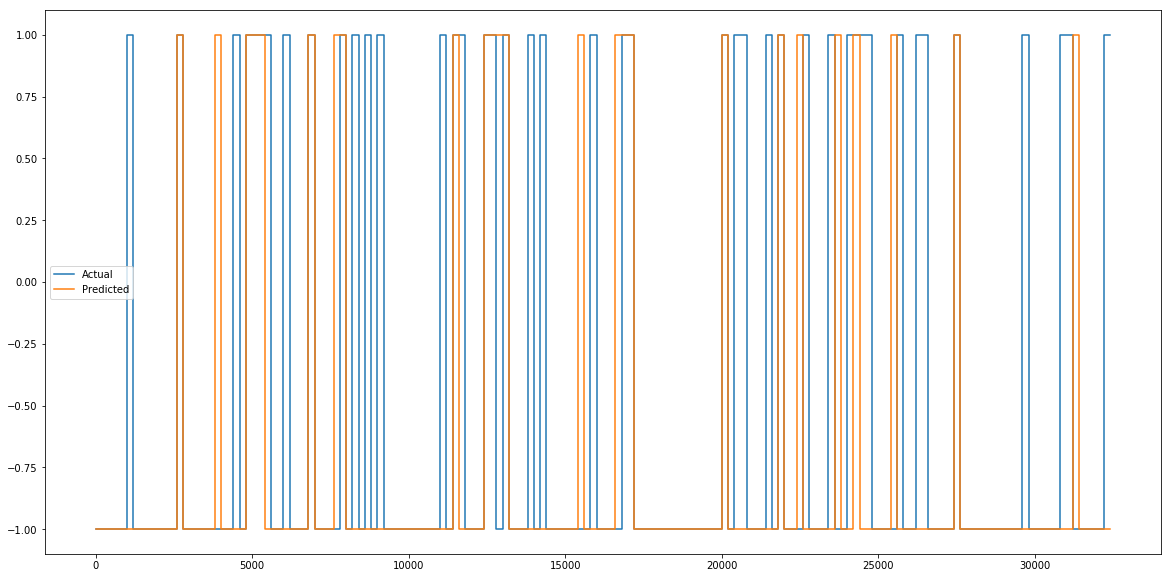

In [661]:
# Plot the output
plt.figure(figsize=(20, 10))
plt.step(range(m)[0::200], Y[0::200], label='Actual')
plt.step(range(m)[0::200], T[0::200], label='Predicted')
plt.legend()
plt.show()

### Experiments on Test Dataset

In [662]:
X = census_test
Y = [-1 if y == '<=50K' else 1 for y in X['salary'].values]
m = np.shape(X)[0]
T = classifier.use(X[['age','education-num']].values)
T_labels = ['<=50K' if t == -1 else '>50K' for t in T]

display(Markdown('#### Confusion Matrix'))
pd.crosstab(pd.Series(X['salary'].values, name='Actual'), pd.Series(T_labels, name='Predicted'))

#### Confusion Matrix

Predicted,<=50K,>50K
Actual,,
<=50K,11464,971
>50K,2451,1395


In [663]:
display(Markdown('#### Classification Report'))
print(classification_report(X['salary'].values, T_labels))

accuracy = round(accuracy_score(X['salary'].values, T_labels) * 100, 2);
print('Accuracy = ' + str(accuracy) + '%')

#### Classification Report

             precision    recall  f1-score   support

      <=50K       0.82      0.92      0.87     12435
       >50K       0.59      0.36      0.45      3846

avg / total       0.77      0.79      0.77     16281

Accuracy = 78.98%


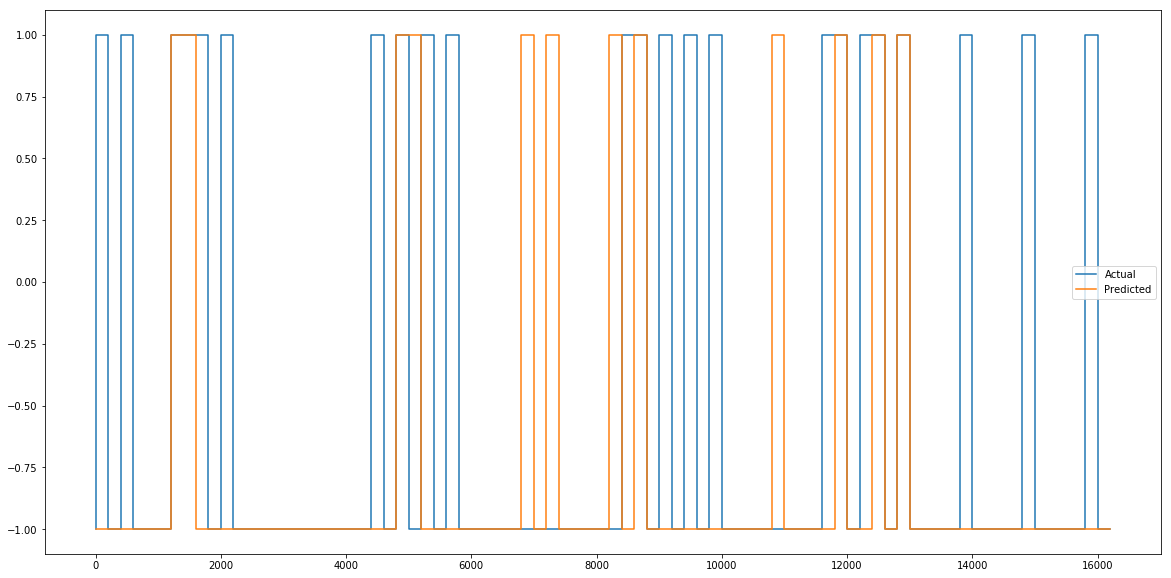

In [575]:
# Plot the output
plt.figure(figsize=(20, 10))
plt.step(range(m)[0::200], Y[0::200], label='Actual')
plt.step(range(m)[0::200], T[0::200], label='Predicted')
plt.legend()
plt.show()

### Results
From the classification results, we can see that Pocket algorithm worked extremely well for class "<=50K". We were able to achieve 82% precision and 92% recall. However, for the other class (">50K"), the results are just average (59% precision and 39% recall), as we have comparatively less data belonging to that class. Accuracy of 79% is also a good indication of the performance of this model.

## Quadratic Discriminant Analysis (QDA)

Text(0.5,1,'Decision Boundary')

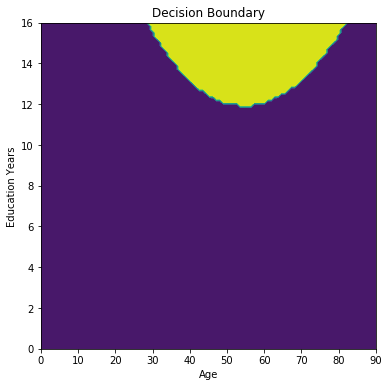

In [719]:
# Train the classifier
classifier = QDA()
X = census_train
Y = [-1 if y == '<=50K' else 1 for y in X['salary'].values]
m = np.shape(X)[0]
classifier.train(X[['age','education-num']].values, Y)

# Plot the decision boundary
xs, ys = np.meshgrid(np.linspace(0, 90, 100), np.linspace(0, 16, 100))
x = np.vstack((xs.flat, ys.flat)).T
zs = classifier.use(x)
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, np.array(zs).reshape(xs.shape))
plt.xlabel('Age')
plt.ylabel('Education Years')
plt.title("Decision Boundary")

### Experiments on Training Dataset

In [720]:
T = classifier.use(X[['age','education-num']].values)
T_labels = ['<=50K' if t == -1 else '>50K' for t in T]

display(Markdown('#### Confusion Matrix'))
pd.crosstab(pd.Series(X['salary'].values, name='Actual'), pd.Series(T_labels, name='Predicted'))

#### Confusion Matrix

Predicted,<=50K,>50K
Actual,,
<=50K,23149,1571
>50K,5225,2616


In [721]:
display(Markdown('#### Classification Report'))
print(classification_report(X['salary'].values, T_labels))

accuracy = round(accuracy_score(X['salary'].values, T_labels) * 100, 2);
print('Accuracy = ' + str(accuracy) + '%')

#### Classification Report

             precision    recall  f1-score   support

      <=50K       0.82      0.94      0.87     24720
       >50K       0.62      0.33      0.43      7841

avg / total       0.77      0.79      0.77     32561

Accuracy = 79.13%


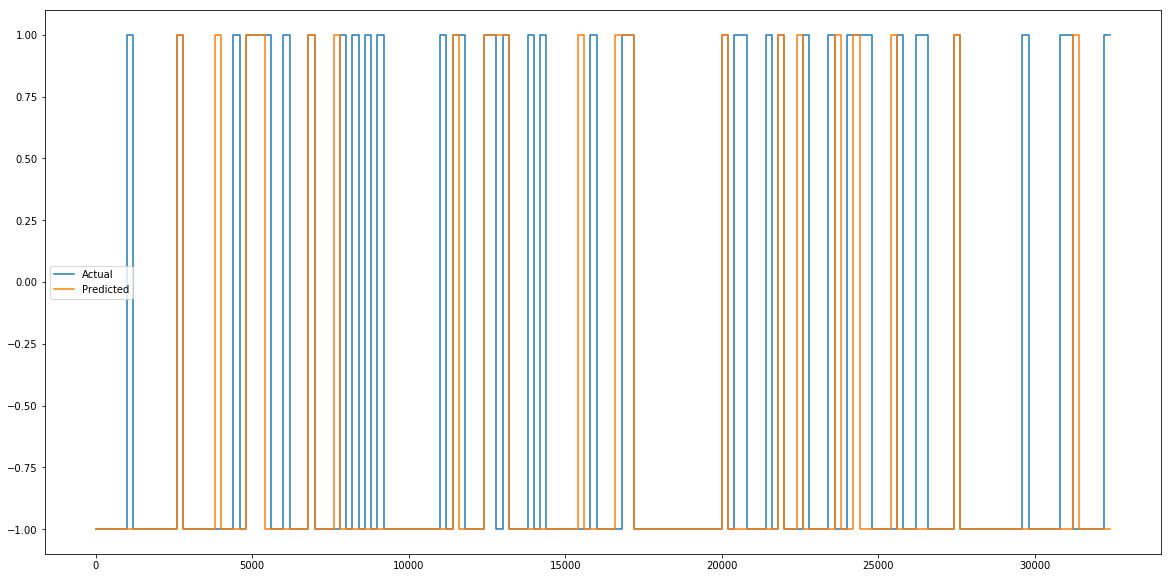

In [722]:
# Plot the output
plt.figure(figsize=(20, 10))
plt.step(range(m)[0::200], Y[0::200], label='Actual')
plt.step(range(m)[0::200], T[0::200], label='Predicted')
plt.legend()
plt.show()

### Experiments on Test Dataset

In [723]:
X = census_test
Y = [-1 if y == '<=50K' else 1 for y in X['salary'].values]
m = np.shape(X)[0]
T = classifier.use(X[['age','education-num']].values)
T_labels = ['<=50K' if t == -1 else '>50K' for t in T]
display(Markdown('#### Confusion Matrix'))
pd.crosstab(pd.Series(X['salary'].values, name='Actual'), pd.Series(T_labels, name='Predicted'))

#### Confusion Matrix

Predicted,<=50K,>50K
Actual,,
<=50K,11622,813
>50K,2567,1279


In [724]:
display(Markdown('#### Classification Report'))
print(classification_report(X['salary'].values, T_labels))

accuracy = round(accuracy_score(X['salary'].values, T_labels) * 100, 2);
print('Accuracy = ' + str(accuracy) + '%')

#### Classification Report

             precision    recall  f1-score   support

      <=50K       0.82      0.93      0.87     12435
       >50K       0.61      0.33      0.43      3846

avg / total       0.77      0.79      0.77     16281

Accuracy = 79.24%


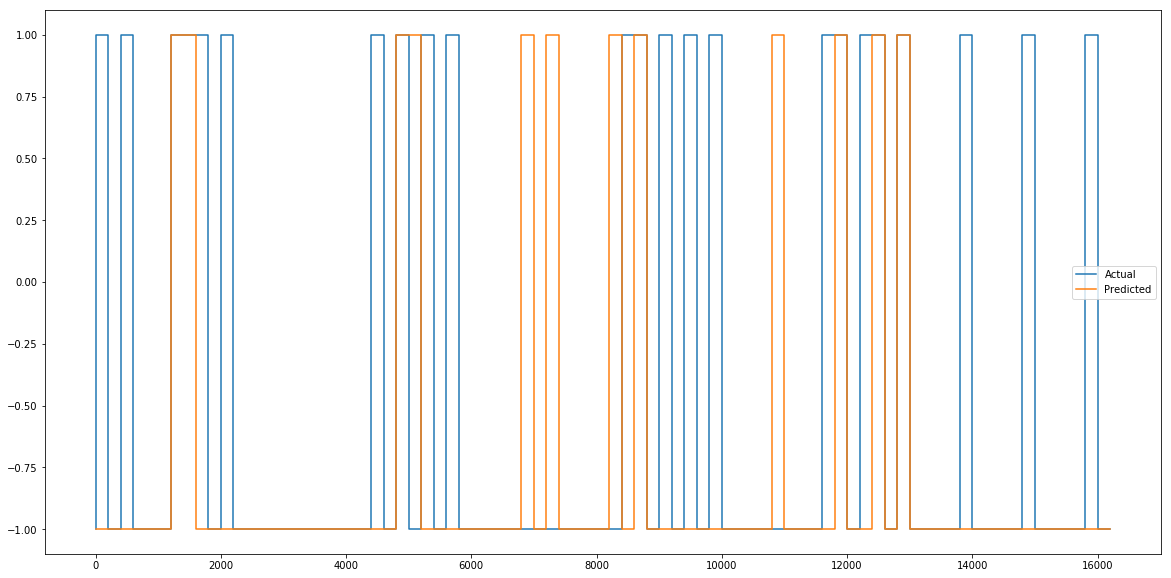

In [725]:
# Plot the output
plt.figure(figsize=(20, 10))
plt.step(range(m)[0::200], Y[0::200], label='Actual')
plt.step(range(m)[0::200], T[0::200], label='Predicted')
plt.legend()
plt.show()

### Results
Similar to Pocket algorithm, QDA algorithm was able to achieve 82% precision and 93% recall for the class "<=50K". The performance for ">50K" is average for the other class (">50K"), 61% precision and 33% recall. The reason is same that most of the data belongs to "<=50K".

Accuracy wise we can say it performed well for both test and training dataset.

## Linear Discriminant Analysis (LDA)

Text(0.5,1,'Decision Boundary')

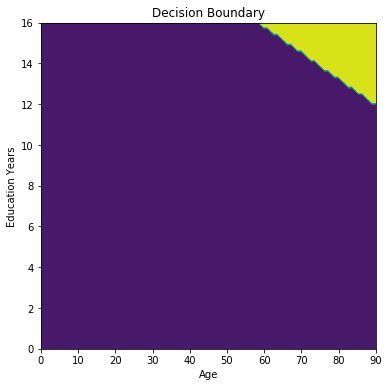

In [726]:
# Train the classifier
classifier = LDA()
X = census_train
Y = [-1 if y == '<=50K' else 1 for y in X['salary'].values]
m = np.shape(X)[0]
classifier.train(X[['age','education-num']].values, Y)

# Plot the decision boundary
xs, ys = np.meshgrid(np.linspace(0, 90, 100), np.linspace(0, 16, 100))
x = np.vstack((xs.flat, ys.flat)).T
zs = classifier.use(x)
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, np.array(zs).reshape(xs.shape))
plt.xlabel('Age')
plt.ylabel('Education Years')
plt.title("Decision Boundary")

### Experiments on Training Dataset

In [727]:
T = classifier.use(X[['age','education-num']].values)
T_labels = ['<=50K' if t == -1 else '>50K' for t in T]
display(Markdown('#### Confusion Matrix'))
pd.crosstab(pd.Series(X['salary'].values, name='Actual'), pd.Series(T_labels, name='Predicted'))

#### Confusion Matrix

Predicted,<=50K,>50K
Actual,,
<=50K,24660,60
>50K,7757,84


In [728]:
display(Markdown('#### Classification Report'))
print(classification_report(X['salary'].values, T_labels))

accuracy = round(accuracy_score(X['salary'].values, T_labels) * 100, 2);
print('Accuracy = ' + str(accuracy) + '%')

#### Classification Report

             precision    recall  f1-score   support

      <=50K       0.76      1.00      0.86     24720
       >50K       0.58      0.01      0.02      7841

avg / total       0.72      0.76      0.66     32561

Accuracy = 75.99%


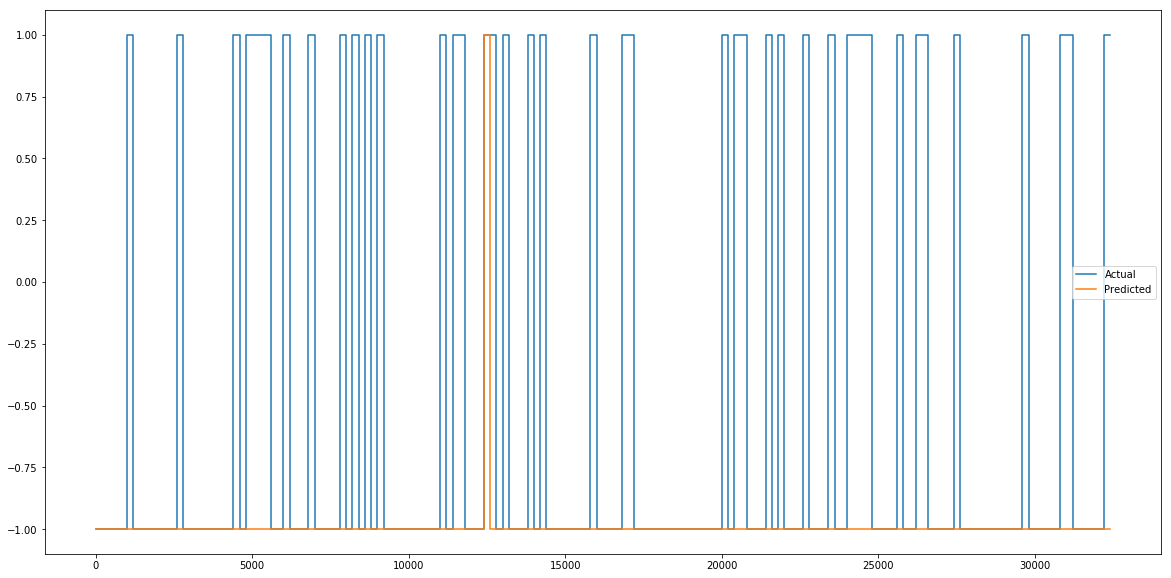

In [729]:
# Plot the output
plt.figure(figsize=(20, 10))
plt.step(range(m)[0::200], Y[0::200], label='Actual')
plt.step(range(m)[0::200], T[0::200], label='Predicted')
plt.legend()
plt.show()

### Experiments on Test Dataset

In [730]:
X = census_test
Y = [-1 if y == '<=50K' else 1 for y in X['salary'].values]
m = np.shape(X)[0]
T = classifier.use(X[['age','education-num']].values)
T_labels = ['<=50K' if t == -1 else '>50K' for t in T]

display(Markdown('#### Confusion Matrix'))
pd.crosstab(pd.Series(X['salary'].values, name='Actual'), pd.Series(T_labels, name='Predicted'))

#### Confusion Matrix

Predicted,<=50K,>50K
Actual,,
<=50K,12414,21
>50K,3811,35


In [731]:
display(Markdown('#### Classification Report'))
print(classification_report(X['salary'].values, T_labels))

accuracy = round(accuracy_score(X['salary'].values, T_labels) * 100, 2);
print('Accuracy = ' + str(accuracy) + '%')

#### Classification Report

             precision    recall  f1-score   support

      <=50K       0.77      1.00      0.87     12435
       >50K       0.62      0.01      0.02      3846

avg / total       0.73      0.76      0.67     16281

Accuracy = 76.46%


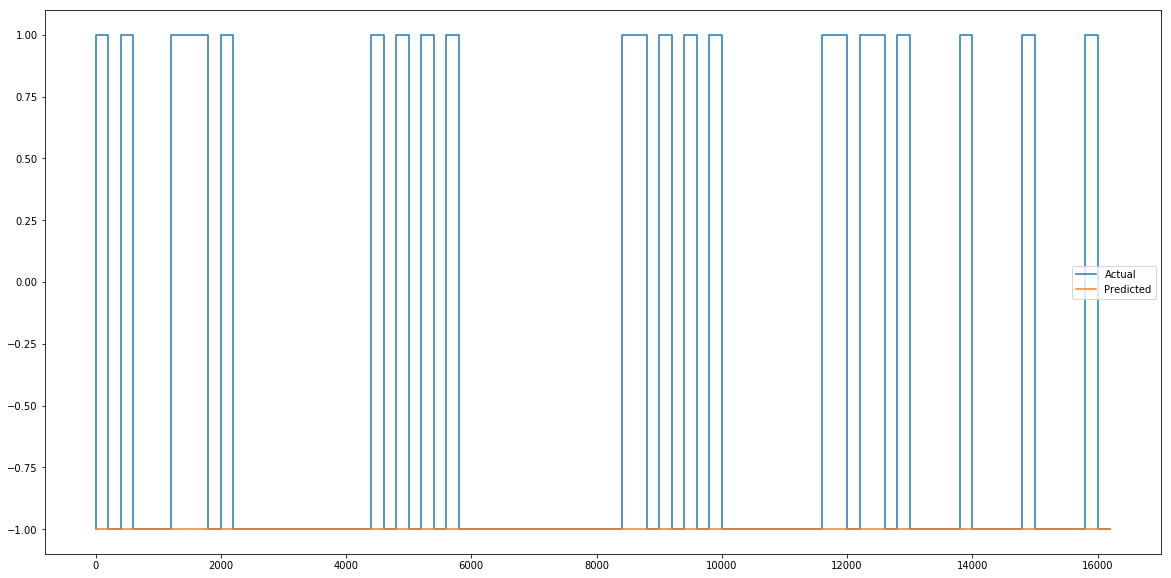

In [732]:
# Plot the output
plt.figure(figsize=(20, 10))
plt.step(range(m)[0::200], Y[0::200], label='Actual')
plt.step(range(m)[0::200], T[0::200], label='Predicted')
plt.legend()
plt.show()

### Results
From the recall value for class ">50K", we can analyze that LDA highly under-performed. Recall of 0.01 means only 10% of the records, which were classified as ">50K" were really of ">50K". However, for class "<=50K", the algorithm achieved 100% recall. From this we can conclude that LDA was classifying most of the records into class "<=50K". 

## Logistic Regression

Text(0.5,1,'Decision Boundary')

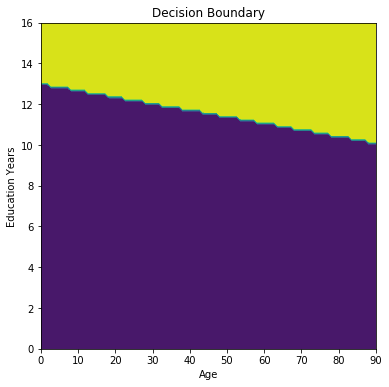

In [734]:
# Train the classifier
classifier = LogisticRegression()
X = census_train.sample(500)
Y = [-1 if y == '<=50K' else 1 for y in X['salary'].values]
m = np.shape(X)[0]
classifier.train(X[['age','education-num']].values, Y)

# Plot the decision boundary
xs, ys = np.meshgrid(np.linspace(0, 90, 100), np.linspace(0, 16, 100))
x = np.vstack((xs.flat, ys.flat)).T
zs = classifier.use(x)
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, np.array(zs).reshape(xs.shape))
plt.xlabel('Age')
plt.ylabel('Education Years')
plt.title("Decision Boundary")

### Experiments on Training Dataset

In [735]:
T = classifier.use(X[['age','education-num']].values)
T_labels = ['<=50K' if t == -1 else '>50K' for t in T]
display(Markdown('#### Confusion Matrix'))
pd.crosstab(pd.Series(X['salary'].values, name='Actual'), pd.Series(T_labels, name='Predicted'))

#### Confusion Matrix

Predicted,<=50K,>50K
Actual,,
<=50K,312,77
>50K,49,62


In [736]:
display(Markdown('#### Classification Report'))
print(classification_report(X['salary'].values, T_labels))

accuracy = round(accuracy_score(X['salary'].values, T_labels) * 100, 2);
print('Accuracy = ' + str(accuracy) + '%')

#### Classification Report

             precision    recall  f1-score   support

      <=50K       0.86      0.80      0.83       389
       >50K       0.45      0.56      0.50       111

avg / total       0.77      0.75      0.76       500

Accuracy = 74.8%


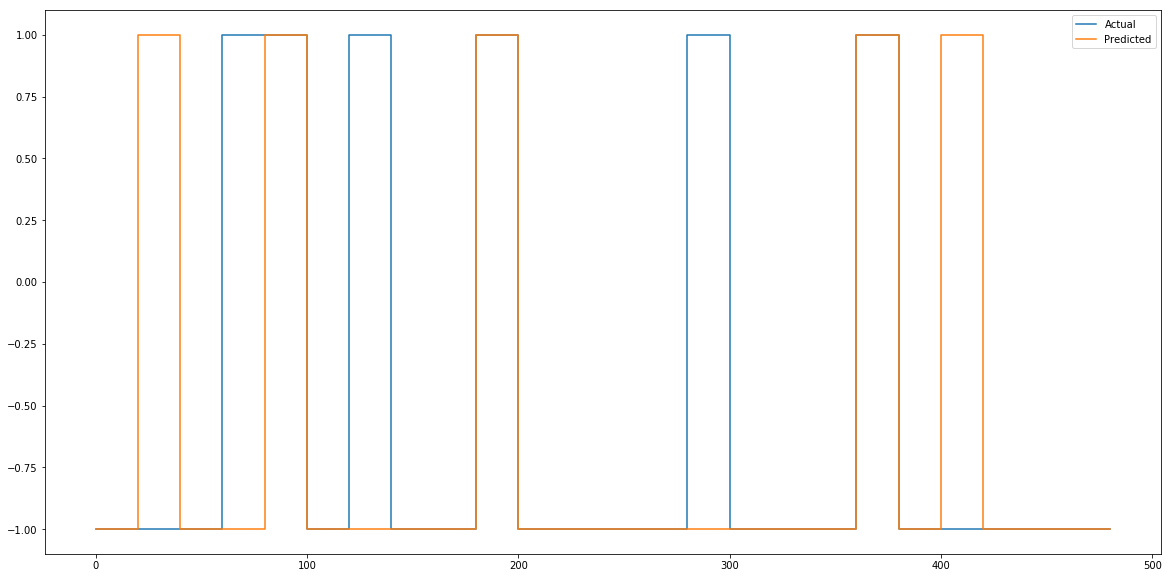

In [737]:
# Plot the output
plt.figure(figsize=(20, 10))
plt.step(range(m)[0::20], Y[0::20], label='Actual')
plt.step(range(m)[0::20], T[0::20], label='Predicted')
plt.legend()
plt.show()

### Experiments on Test Dataset

In [738]:
X = census_test
Y = [-1 if y == '<=50K' else 1 for y in X['salary'].values]
m = np.shape(X)[0]
T = classifier.use(X[['age','education-num']].values)
T_labels = ['<=50K' if t == -1 else '>50K' for t in T]

display(Markdown('#### Confusion Matrix'))
pd.crosstab(pd.Series(X['salary'].values, name='Actual'), pd.Series(T_labels, name='Predicted'))

#### Confusion Matrix

Predicted,<=50K,>50K
Actual,,
<=50K,10044,2391
>50K,1797,2049


In [739]:
display(Markdown('#### Classification Report'))
print(classification_report(X['salary'].values, T_labels))

accuracy = round(accuracy_score(X['salary'].values, T_labels) * 100, 2);
print('Accuracy = ' + str(accuracy) + '%')

#### Classification Report

             precision    recall  f1-score   support

      <=50K       0.85      0.81      0.83     12435
       >50K       0.46      0.53      0.49      3846

avg / total       0.76      0.74      0.75     16281

Accuracy = 74.28%


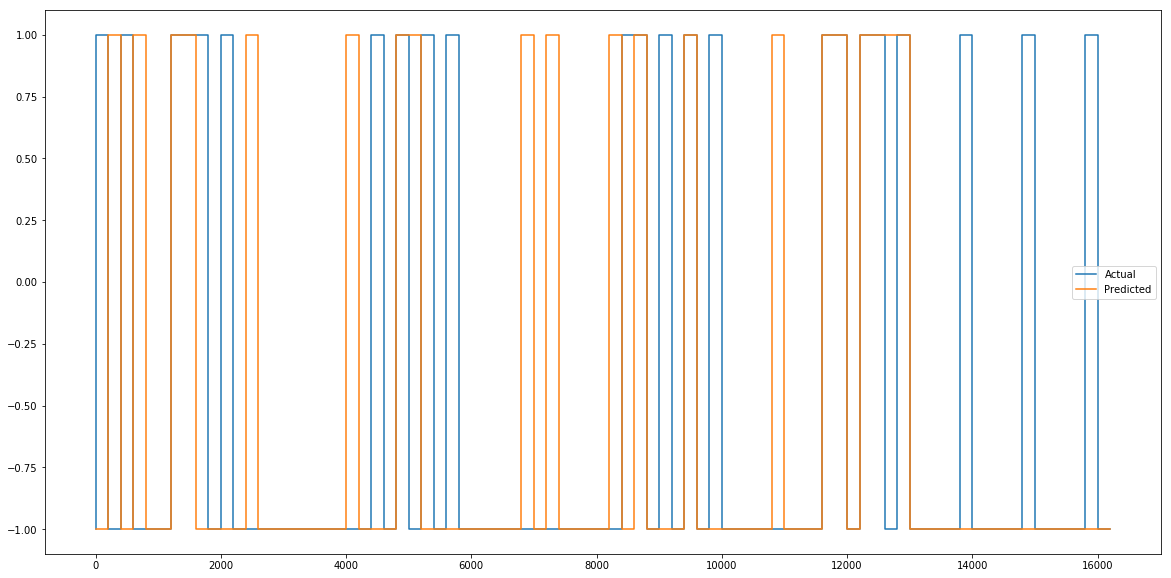

In [740]:
# Plot the output
plt.figure(figsize=(20, 10))
plt.step(range(m)[0::200], Y[0::200], label='Actual')
plt.step(range(m)[0::200], T[0::200], label='Predicted')
plt.legend()
plt.show()

### Results
Unlike the previous algorithms, Logistic Regression decently performed for both classes. We have average Precision and Recall values, which concludes that the algorithm didn't bias between the classes.

From the accuracy wise, 65% and 68% is decent.

# Conclusions
In this assignment, the census data is classified using 4 different classification algorithms, namely Perceptron Pocket, QDA, LDA and Linear Regression. I have picked "age" and "education-num" (number of years of education) as the input features, predicted salary range.

## Comparison of Algorithms
A summary of the performance stats of those algorithms is as follows:

### Pocket Algorithm
Accuracy: 78.89% (training), 78.98% (test)
Average Precision: 77% (training), 77% (test)

### QDA
Accuracy: 79.13% (training), 79.24% (test)
Average Precision: 77% (training), 77% (test)

### LDA
Accuracy: 75.99% (training), 76.46% (test)
Average Precision: 72% (training), 73% (test)

### Logistic Regression
Accuracy: 74.8% (training), 74.28% (test)
Average Precision: 76% (training), 74% (test)

The above results clearly indicate that QDA outperforms other algorithms. However, as discussed above, the numbers for Logistic Regression are decent for both "<=50K" and ">50K"; while for the other models the positive results are more aligned towards class "<=50K". Therefore, in my opinion, Logistic Regression worked best.

## Challenges
A major challenge I have faced was related to the training of Logistic Regression. By providing the entire training set, coefficients calculated by the "softmax" function was going out of the limit. To overcome this challenge, I have trained the model on a smaller random sample of the dataset.

## Learning
With this assignment, I have got clear understanding of dealing with the size of matrices; as matrix calculations was a critical part of these models.


# References

## Data
The dataset for this experiment is picked from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Census+Income). It was prepared by Ronny Kohavi and Barry Becker in the Data Mining and Visualization Laboratory of Silicon Graphics. The citation for the original source is as follows:

*Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996*

## Plot
Plotting has been done using the Python's Matplotlib package, https://matplotlib.org/index.html. To understand the syntax, following tutorials on the Matplotlib website has been referred.
* https://matplotlib.org/examples/pylab_examples/boxplot_demo.html
* https://matplotlib.org/examples/pylab_examples/step_demo.html